---
<a name='title'></a>
# **<font color="Navy"> Seminario: Modelación Climática Tropical </font>**
## **<font color="RoyalBlue"> 1er semestre </font>**
### **<font color="DodgerBlue"> Notebook 1: Anomalías y estadísticos </font>**
### Escuela Nacional de Ciencias de la Tierra
#### Semestre 2025-I

---

## **<font color="ForestGreen"> 1. Compuestos  </font>**

El análisis de compuestos es una técnica estadística utilizada en meteorología y climatología para identificar y caracterizar patrones o anomalías asociados con eventos específicos o condiciones particulares. Consiste en promediar variables atmosféricas u oceánicas (como temperatura, precipitación, presión, etc.) durante períodos seleccionados que cumplen ciertos criterios, como eventos de El Niño, La Niña, fases positivas o negativas de la Oscilación del Atlántico Norte (NAO), entre otros.

El objetivo es resaltar, o aislar, las señales climatológicas asociadas con estos eventos, eliminando la variabilidad aleatoria o el "ruido" que podría ocultar dichas señales en análisis individuales o en series temporales completas.

Veamos en un ejercicio a qué nos referimos.

In [61]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### **<font color="OrangeRed">  Datos de HadSST </font>**

Los datos de HadSST (Hadley Centre Sea Ice and Sea Surface Temperature) son un conjunto de datos que contienen observaciones de temperatura de la superficie del mar (SST) recopiladas por el Met Office Hadley Centre. Estos datos se utilizan ampliamente en la investigación climática para estudiar las variaciones de temperatura en los océanos a lo largo del tiempo.

Aquí hay una descripción de los principales aspectos de los datos de HadSST:

- Fuente de Datos: Los datos de HadSST son recopilados y mantenidos por el Met Office Hadley Centre, que es parte del Servicio Meteorológico del Reino Unido. Se basan en observaciones de temperatura de la superficie del mar obtenidas de una variedad de fuentes, incluidas boyas oceánicas, buques y satélites.

- Resolución Espacial y Temporal: Los datos de HadSST están disponibles con diferentes resoluciones espaciales y temporales. Las versiones más recientes suelen tener una resolución temporal mensual y una resolución espacial de alrededor de 1° de latitud y longitud.

- Cobertura Temporal: Los datos de HadSST cubren un período de tiempo prolongado, que se remonta a finales del siglo XIX o principios del siglo XX, dependiendo de la versión específica del conjunto de datos. Esto permite estudiar las variaciones de temperatura del mar a lo largo de varias décadas o incluso siglos.

- Calidad y Homogeneidad: El Met Office Hadley Centre se esfuerza por mantener la calidad y la homogeneidad de los datos de HadSST. Se aplican correcciones y ajustes a los datos para corregir errores instrumentales, cambios en los métodos de medición y otros sesgos potenciales, con el objetivo de producir un conjunto de datos coherente y de alta calidad.

- Aplicaciones: Los datos de HadSST se utilizan en una amplia gama de aplicaciones en la investigación climática, incluida la monitorización de la variabilidad del clima oceánico, el estudio de los efectos del cambio climático en los océanos, la calibración y validación de modelos climáticos, y la evaluación de los impactos ambientales y socioeconómicos relacionados con los océanos y el clima.
    
    
Descarga: https://www.metoffice.gov.uk/hadobs/hadsst4/data/download.html


In [62]:
ds=xr.open_dataset('HadSST.4.0.1.0_median.nc')
ds

<xarray.Dataset> Size: 22MB
Dimensions:         (time: 2090, latitude: 36, longitude: 72, bnds: 2)
Coordinates:
  * time            (time) datetime64[ns] 17kB 1850-01-16T12:00:00 ... 2024-0...
  * latitude        (latitude) float64 288B -87.5 -82.5 -77.5 ... 77.5 82.5 87.5
  * longitude       (longitude) float64 576B -177.5 -172.5 ... 172.5 177.5
Dimensions without coordinates: bnds
Data variables:
    tos             (time, latitude, longitude) float32 22MB ...
    time_bnds       (time, bnds) datetime64[ns] 33kB ...
    latitude_bnds   (latitude, bnds) float64 576B ...
    longitude_bnds  (longitude, bnds) float64 1kB ...
Attributes:
    comment:      
    history:      Converted to netcdf today
    institution:  Met Office
    reference:    Kennedy et al. (2019), https://www.metoffice.gov.uk/hadobs/...
    source:       surface observation
    title:        Ensemble-median sea-surface temperature anomalies from the ...
    version:      HadSST.4.0.1.0
    Conventions:  CF-1.7

Vamos a seleccionar una sola latitud y longitud, para que no haya pierde por ahora con la información espacial. En esta caso, vamos a seleccionar una latitud y longitud en la región de El Niño 3.4.

In [63]:
# Slice en latitud y longitud
arr_sliced = ds.sel(latitude=0,longitude=200,method='nearest')
print(arr_sliced)

<xarray.Dataset> Size: 59kB
Dimensions:         (time: 2090, bnds: 2)
Coordinates:
  * time            (time) datetime64[ns] 17kB 1850-01-16T12:00:00 ... 2024-0...
    latitude        float64 8B 2.5
    longitude       float64 8B 177.5
Dimensions without coordinates: bnds
Data variables:
    tos             (time) float32 8kB ...
    time_bnds       (time, bnds) datetime64[ns] 33kB ...
    latitude_bnds   (bnds) float64 16B ...
    longitude_bnds  (bnds) float64 16B ...
Attributes:
    comment:      
    history:      Converted to netcdf today
    institution:  Met Office
    reference:    Kennedy et al. (2019), https://www.metoffice.gov.uk/hadobs/...
    source:       surface observation
    title:        Ensemble-median sea-surface temperature anomalies from the ...
    version:      HadSST.4.0.1.0
    Conventions:  CF-1.7


In [64]:
# Añadir la información de temporada a la coordenada de tiempo
arr_sliced = arr_sliced.assign_coords(season=arr_sliced['time'].dt.season)

# Seleccionar los datos de DJF
arr_djf = arr_sliced.where(arr_sliced['season'] == 'DJF', drop=True)

# Calcular la climatología DJF (promedio a lo largo de los años)
climatologia_djf = arr_djf.groupby('time.month').mean('time')

In [65]:
clim_X=climatologia_djf.mean('month')

In [66]:
clim_X.tos

<xarray.DataArray 'tos' ()> Size: 4B
array(0.04386561, dtype=float32)
Coordinates:
    latitude   float64 8B 2.5
    longitude  float64 8B 177.5

Ahora bien, a esta climatología de invierno le llamaremos  $\bar{X}$ y la utilizaremos más adelante. Por ahora, es importante mencionar y recalcar que el clima es mucho más que esta climatología, sino que también está compuesto por su *variabilidad*. Por ejemplo, veamos las anomalías asociadas del índice que nos ayuda a identificar eventos de El Niño y La Niña. 

In [67]:
data='/home/jorgelsgf/Documents/ENCiT/2025-I/seminario/data/ENSO_df.csv'
ENSO_index=pd.read_csv(data)

Nuestro DataFrame para el índice ENSO es un objeto de Pandas que representa el Índice Oceánico de El Niño (ONI). Este índice es fundamental en climatología para monitorear y analizar las condiciones de El Niño y La Niña en el Océano Pacífico central y oriental.

In [68]:
ENSO_index

,Date,ENSO
0,1951-01-15,-0.82
1,1951-02-15,1.79
2,1951-03-15,1.49
3,1951-04-15,1.14
4,1951-05-15,0.71
...,...,...
871,2023-08-15,1.32
872,2023-09-15,1.56
873,2023-10-15,1.78
874,2023-11-15,1.92


Usamos `pd.to_datetime()` para convertir la columna `Date` a objetos datetime, lo que facilita operaciones basadas en el tiempo.

In [69]:
# Convertir la columna 'Date' a tipo datetime
ENSO_index['Date'] = pd.to_datetime(ENSO_index['Date'])

# Establecer la columna 'Date' como índice del DataFrame
ENSO_index.set_index('Date', inplace=True)

Aplicamos un promedio móvil de 5 meses para suavizar la serie y resaltar tendencias, utilizando el método `rolling()` de Pandas. 

Añadimos una columna con el mes y utilizamos esta información para seleccionar datos de una temporada específica, como diciembre, enero y febrero (DJF).

In [70]:
# Calcular el promedio móvil de 5 meses (rolling mean)
ENSO_index['ENSO_5mo_rm'] = ENSO_index['ENSO'].rolling(window=5, center=True).mean()

# Añadir una columna con el mes para facilitar la selección de DJF
ENSO_index['month'] = ENSO_index.index.month

# Definir los meses correspondientes a la temporada DJF (diciembre, enero, febrero)
djf_months = [12, 1, 2]

# Filtrar los datos para obtener solo los registros de DJF
ENSO_index_DJF = ENSO_index[ENSO_index['month'].isin(djf_months)]

El Índice Oceánico de El Niño (ONI) es el indicador estándar utilizado para identificar eventos de El Niño y La Niña. Se calcula como la anomalía de la temperatura superficial del mar (SST) en la región Niño 3.4 (5°N-5°S, 170°-120°W), promediada en períodos de tres meses consecutivos. En nuestro DataFrame:

- Valores positivos del ONI (≥ +0.5°C): Indican condiciones de El Niño.
- Valores negativos del ONI (≤ -0.5°C): Indican condiciones de La Niña.
- Valores entre -0.5°C y +0.5°C: Indican condiciones neutrales.

In [71]:
# Identificar eventos de El Niño y La Niña basados en umbrales
# Umbral para El Niño: índice ENSO >= 0.5
# Umbral para La Niña: índice ENSO <= -0.5
el_nino_threshold = 0.5
la_nina_threshold = -0.5

In [72]:
# Crear listas de fechas para eventos de El Niño y La Niña
el_nino_dates = ENSO_index_DJF[ENSO_index_DJF['ENSO_5mo_rm'] >= el_nino_threshold].index
la_nina_dates = ENSO_index_DJF[ENSO_index_DJF['ENSO_5mo_rm'] <= la_nina_threshold].index
# Crear DataFrames para eventos de El Niño y La Niña
el_nino_events = ENSO_index_DJF[ENSO_index_DJF['ENSO_5mo_rm'] >= el_nino_threshold]
la_nina_events = ENSO_index_DJF[ENSO_index_DJF['ENSO_5mo_rm'] <= la_nina_threshold]

In [73]:
arr_sliced['time'].dt.date

<xarray.DataArray 'date' (time: 2090)> Size: 17kB
array([datetime.date(1850, 1, 16), datetime.date(1850, 2, 15),
       datetime.date(1850, 3, 16), ..., datetime.date(2023, 12, 16),
       datetime.date(2024, 1, 16), datetime.date(2024, 2, 15)],
      dtype=object)
Coordinates:
  * time       (time) datetime64[ns] 17kB 1850-01-16T12:00:00 ... 2024-02-15T...
    latitude   float64 8B 2.5
    longitude  float64 8B 177.5
    season     (time) <U3 25kB 'DJF' 'DJF' 'MAM' 'MAM' ... 'DJF' 'DJF' 'DJF'
Attributes:
    axis:           T
    bounds:         time_bnds
    standard_name:  time
    long_name:      time

In [74]:
# Truncar las fechas a año y mes en los eventos de El Niño y La Niña
el_nino_dates = el_nino_events.index.to_period('M').to_timestamp()
la_nina_dates = la_nina_events.index.to_period('M').to_timestamp()

In [75]:
# Formatear las fechas como '%Y-%m' para evitar problemas de idioma
arr_sliced_dates_str = arr_sliced['time'].dt.strftime('%Y-%m')
el_nino_dates_str = el_nino_events.index.strftime('%Y-%m')
la_nina_dates_str = la_nina_events.index.strftime('%Y-%m')

In [76]:
# Asignar las cadenas de fecha como nueva coordenada
arr_sliced = arr_sliced.assign_coords(time_str=arr_sliced_dates_str)

In [77]:
# Crear máscaras booleanas para seleccionar los datos
el_nino_mask = arr_sliced.time_str.isin(el_nino_dates_str)
la_nina_mask = arr_sliced.time_str.isin(la_nina_dates_str)

# Seleccionar los datos correspondientes utilizando indexación booleana
arr_el_nino = arr_sliced.where(el_nino_mask, drop=True)
arr_la_nina = arr_sliced.where(la_nina_mask, drop=True)

In [78]:
arr_el_nino

<xarray.Dataset> Size: 5kB
Dimensions:         (time: 68, bnds: 2)
Coordinates:
  * time            (time) datetime64[ns] 544B 1951-12-16T12:00:00 ... 2019-0...
    latitude        float64 8B 2.5
    longitude       float64 8B 177.5
    season          (time) <U3 816B 'DJF' 'DJF' 'DJF' ... 'DJF' 'DJF' 'DJF'
    time_str        (time) object 544B '1951-12' '1952-01' ... '2019-02'
Dimensions without coordinates: bnds
Data variables:
    tos             (time) float32 272B nan nan nan nan ... 0.5568 1.279 nan
    time_bnds       (time, bnds) datetime64[ns] 1kB 1951-12-01 ... 2019-03-01
    latitude_bnds   (bnds, time) float64 1kB 0.0 0.0 0.0 0.0 ... 5.0 5.0 5.0 5.0
    longitude_bnds  (bnds, time) float64 1kB 175.0 175.0 175.0 ... 180.0 180.0
Attributes:
    comment:      
    history:      Converted to netcdf today
    institution:  Met Office
    reference:    Kennedy et al. (2019), https://www.metoffice.gov.uk/hadobs/...
    source:       surface observation
    title:        Ensemble-median sea-surface temperature anomalies from the ...
    version:      HadSST.4.0.1.0
    Conventions:  CF-1.7

In [79]:
# funcion para calcular climatologia para una seleccion que tiene, potencialmente, meses diferentes
def composite_mean(da):
    # Calcular la climatología 
    climatologia = da.groupby('time.month').mean('time')
    clim=climatologia.mean('month')
    return clim

En ciencias atmosféricas, una anomalía representa la diferencia entre un valor observado y un valor de referencia conocido como climatología o periodo base. La climatología se obtiene generalmente como un promedio de largo plazo, lo que permite identificar comportamientos típicos del clima y facilita la detección de desviaciones o anomalías. Por ejemplo, una anomalía diaria de temperatura se calcula comparando el valor observado de un día específico con el promedio de ese día en el ciclo anual, que incluye datos de muchos años para cada día del año. Este promedio de ciclo anual refleja el comportamiento esperado para cada día, y la anomalía indica si el valor observado está por encima o por debajo de lo que es considerado normal. Las anomalías son útiles porque permiten centrarse en las desviaciones del comportamiento habitual, ayudando a entender mejor eventos extremos y variaciones climáticas.

Por ejemplo, definamos una variable $x$, que puede ser la temperatura superficial del mar. Podemos obtener su climatología para un periodo específico. Esta climatología la denotamos arriba como $\bar{X}$. 

CUna anomalía es la diferencia entre un valor observado y un valor de referencia o climatología. Es decir:

\begin{align}
Anomalia=Valor observado−Valor climatologico
\end{align}

o, mejor dicho, la anomalía de la observación $i$ está dada como la resta entre la observación $O$ y la climatología:

\begin{align}
A_i=O_i−\bar{X}
\end{align}

En el caso de HadSST, los datos ya vienen expresados como anomalías. Esto significa que cada valor en tus datos representa la desviación respecto al promedio climatológico de un período base establecido.

In [80]:
composite_mean(arr_djf.tos)

<xarray.DataArray 'tos' ()> Size: 4B
array(0.04386561, dtype=float32)
Coordinates:
    latitude   float64 8B 2.5
    longitude  float64 8B 177.5

In [81]:
composite_mean(arr_el_nino.tos)

<xarray.DataArray 'tos' ()> Size: 4B
array(0.57518727, dtype=float32)
Coordinates:
    latitude   float64 8B 2.5
    longitude  float64 8B 177.5

In [82]:
composite_mean(arr_la_nina.tos)

<xarray.DataArray 'tos' ()> Size: 4B
array(-0.7008751, dtype=float32)
Coordinates:
    latitude   float64 8B 2.5
    longitude  float64 8B 177.5

In [83]:
import seaborn as sns

In [84]:
# Extraer los datos como arrays unidimensionales
data_total = arr_sliced.tos.values.flatten()
data_el_nino = arr_el_nino.tos.values.flatten()
data_la_nina = arr_la_nina.tos.values.flatten()

In [85]:
# Crear DataFrames
df_total = pd.DataFrame({'Temperatura': data_total, 'Evento': 'Total'})
df_el_nino = pd.DataFrame({'Temperatura': data_el_nino, 'Evento': 'El Niño'})
df_la_nina = pd.DataFrame({'Temperatura': data_la_nina, 'Evento': 'La Niña'})

# Combinar los DataFrames
df_combined = pd.concat([df_total, df_el_nino, df_la_nina], ignore_index=True)

# Eliminar valores NaN
df_combined = df_combined.dropna(subset=['Temperatura'])

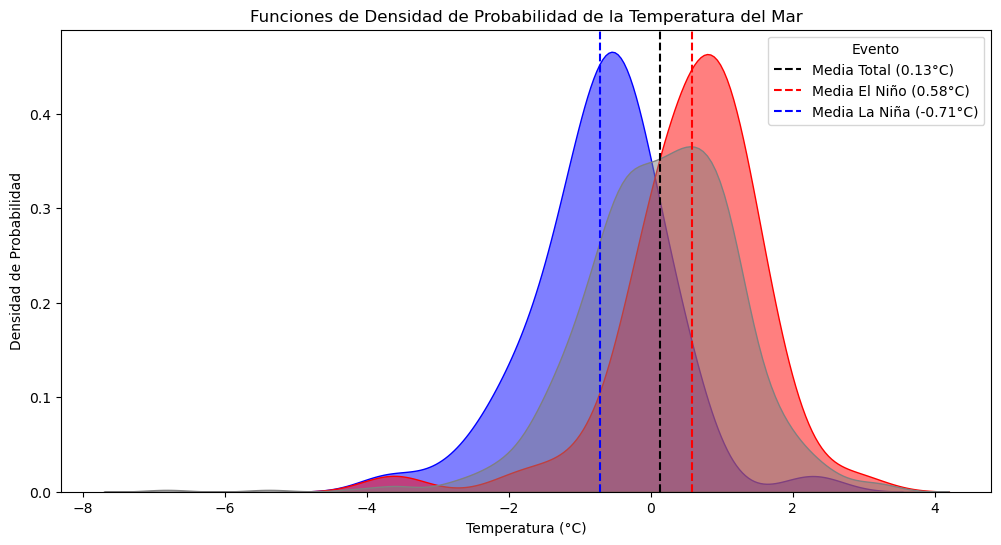

In [86]:
# Crear la gráfica
plt.figure(figsize=(12, 6))

# Definir la paleta de colores
palette = {'Total': 'gray', 'El Niño': 'red', 'La Niña': 'blue'}

# Graficar las densidades
sns.kdeplot(data=df_combined, x='Temperatura', hue='Evento', fill=True, common_norm=False, alpha=0.5, palette=palette)

# Calcular y graficar las medias
mean_total = df_total['Temperatura'].mean()
mean_el_nino = df_el_nino['Temperatura'].mean()
mean_la_nina = df_la_nina['Temperatura'].mean()

plt.axvline(mean_total, color='black', linestyle='--', label=f'Media Total ({mean_total:.2f}°C)')
plt.axvline(mean_el_nino, color='red', linestyle='--', label=f'Media El Niño ({mean_el_nino:.2f}°C)')
plt.axvline(mean_la_nina, color='blue', linestyle='--', label=f'Media La Niña ({mean_la_nina:.2f}°C)')

# Añadir título y etiquetas
plt.title('Funciones de Densidad de Probabilidad de la Temperatura del Mar')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Densidad de Probabilidad')

# Mostrar la leyenda
plt.legend(title='Evento')




## **<font color="ForestGreen"> Pruebas estadísticas  </font>**

La prueba **t de Student** es una prueba estadística que se utiliza para determinar si hay una diferencia significativa entre las medias de dos conjuntos de datos. Es especialmente útil cuando las muestras son pequeñas y las desviaciones estándar de los grupos son desconocidas pero asumidas iguales.
Conceptos clave:

- Hipótesis Nula ($H_0$): Supone que no hay diferencia significativa entre las medias de los dos grupos.
- Hipótesis Alternativa ($H_1$): Indica que existe una diferencia significativa entre las medias.
- Nivel de Significancia ($\alpha$): Probabilidad de rechazar la hipótesis nula cuando es verdadera, comúnmente establecido en 0.05.
- Estadístico t: Valor calculado a partir de los datos que se compara con el valor crítico de la distribución t de Student para determinar si se rechaza H₀.
- p-valor (*p-value*): Probabilidad de obtener un resultado tan extremo como el observado, asumiendo que H₀ es verdadera.

In [87]:
from scipy import stats

In [88]:
# Realizar la prueba t de Student
t_statistic, p_value = stats.ttest_ind(data_el_nino, data_la_nina, equal_var=False, nan_policy='omit')

La función `stats.ttest_ind` tiene las siguientes propiedades:

- stats.ttest_ind: Realiza una prueba t de Student para muestras independientes.
- equal_var=False: Especifica que no se asume varianza igual entre los grupos (prueba t de Welch).
- nan_policy='omit': Omite los valores NaN en los cálculos.
- t_statistic: Valor del estadístico t calculado.
- p_value: Valor p asociado al estadístico t.

In [89]:
# Imprimir resultados de la prueba t de Student
print(f'Resultados de la prueba t de Student entre El Niño y La Niña:')
print(f'Estadístico t: {t_statistic:.3f}')
print(f'p-valor: {p_value:.3e}')

Resultados de la prueba t de Student entre El Niño y La Niña:
Estadístico t: 6.944
p-valor: 3.131e-10


Ejemplo más general de cómo funciona la t de Student.

In [90]:
# Fijar la semilla para reproducibilidad
np.random.seed(42)

# Generar datos para el Grupo A (por ejemplo, muestra control)
mu_a, sigma_a, n_a = 50, 5, 100  # Media, desviación estándar y tamaño de muestra
data_a = np.random.normal(mu_a, sigma_a, n_a)

# Generar datos para el Grupo B (por ejemplo, muestra experimental)
mu_b, sigma_b, n_b = 55, 5, 100
data_b = np.random.normal(mu_b, sigma_b, n_b)

# Crear un DataFrame combinando ambos grupos
df_synthetic = pd.DataFrame({
    'Valor': np.concatenate([data_a, data_b]),
    'Grupo': ['A'] * n_a + ['B'] * n_b
})


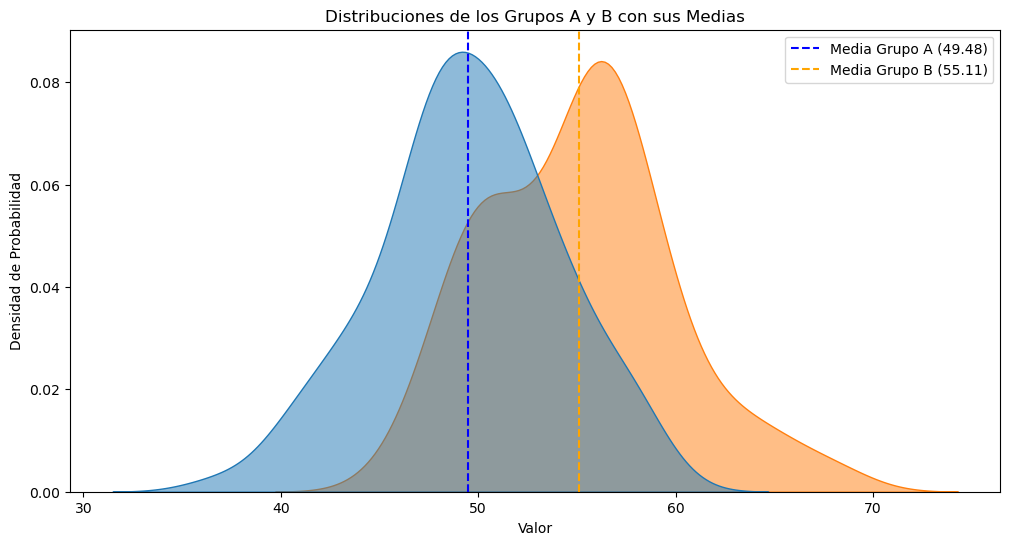

In [91]:
# Crear la figura y los ejes
plt.figure(figsize=(12, 6))

# Graficar las distribuciones KDE
sns.kdeplot(data=df_synthetic, x='Valor', hue='Grupo', fill=True, common_norm=False, alpha=0.5)

# Calcular las medias
mean_a = data_a.mean()
mean_b = data_b.mean()

# Graficar las líneas verticales de las medias
plt.axvline(mean_a, color='blue', linestyle='--', label=f'Media Grupo A ({mean_a:.2f})')
plt.axvline(mean_b, color='orange', linestyle='--', label=f'Media Grupo B ({mean_b:.2f})')

# Añadir título y etiquetas
plt.title('Distribuciones de los Grupos A y B con sus Medias')
plt.xlabel('Valor')
plt.ylabel('Densidad de Probabilidad')

# Mostrar la leyenda
plt.legend()


In [92]:
# Realizar la prueba t de Student
t_statistic, p_value = stats.ttest_ind(data_a, data_b, equal_var=False)

print(f'Estadístico t: {t_statistic:.2f}')
print(f'p-valor: {p_value:.3e}')

Estadístico t: -8.55
p-valor: 3.329e-15


La prueba t de Student evalúa si la diferencia observada entre las medias de dos grupos es estadísticamente significativa, considerando la variabilidad dentro de cada grupo y el tamaño de las muestras. Las curvas kernel density estimation (KDE) representan las distribuciones de los valores en cada grupo.

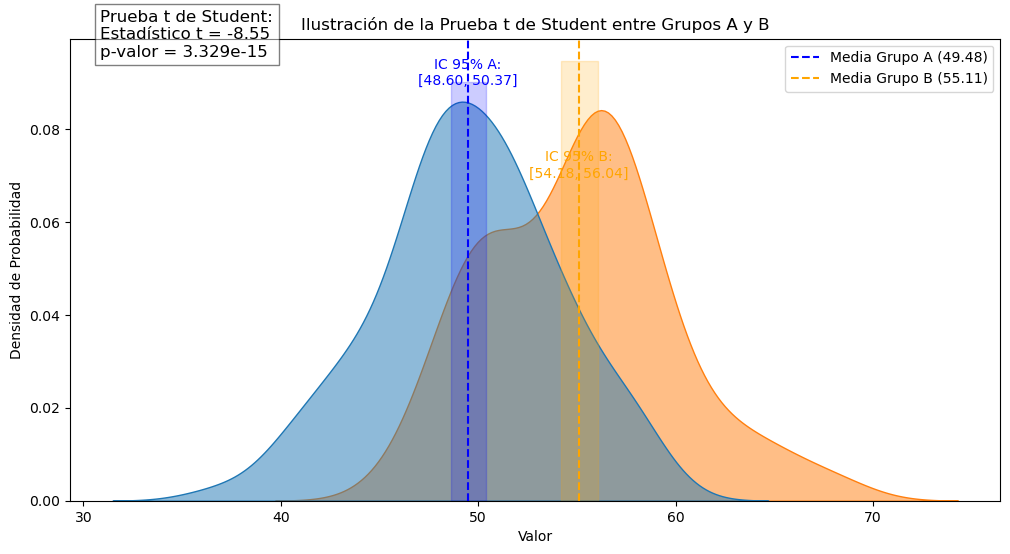

In [93]:
# Calcular las desviaciones estándar
std_a = data_a.std()
std_b = data_b.std()

# Calcular los intervalos de confianza del 95% para las medias
conf_int_a = stats.norm.interval(0.95, loc=mean_a, scale=std_a/np.sqrt(n_a))
conf_int_b = stats.norm.interval(0.95, loc=mean_b, scale=std_b/np.sqrt(n_b))

# Crear la figura y los ejes
plt.figure(figsize=(12, 6))

# Graficar las distribuciones KDE
sns.kdeplot(data=df_synthetic, x='Valor', hue='Grupo', fill=True, common_norm=False, alpha=0.5)

# Graficar las líneas verticales de las medias
plt.axvline(mean_a, color='blue', linestyle='--', label=f'Media Grupo A ({mean_a:.2f})')
plt.axvline(mean_b, color='orange', linestyle='--', label=f'Media Grupo B ({mean_b:.2f})')

# Graficar los intervalos de confianza
plt.fill_betweenx(y=[0, plt.gca().get_ylim()[1]], x1=conf_int_a[0], x2=conf_int_a[1], color='blue', alpha=0.2)
plt.fill_betweenx(y=[0, plt.gca().get_ylim()[1]], x1=conf_int_b[0], x2=conf_int_b[1], color='orange', alpha=0.2)

# Añadir anotaciones
plt.text(mean_a, plt.gca().get_ylim()[1]*0.9, f"IC 95% A:\n[{conf_int_a[0]:.2f}, {conf_int_a[1]:.2f}]", color='blue', ha='center')
plt.text(mean_b, plt.gca().get_ylim()[1]*0.7, f"IC 95% B:\n[{conf_int_b[0]:.2f}, {conf_int_b[1]:.2f}]", color='orange', ha='center')

# Añadir el resultado de la prueba t en la gráfica
plt.figtext(0.15, 0.85, f'Prueba t de Student:\nEstadístico t = {t_statistic:.2f}\np-valor = {p_value:.3e}', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Añadir título y etiquetas
plt.title('Ilustración de la Prueba t de Student entre Grupos A y B')
plt.xlabel('Valor')
plt.ylabel('Densidad de Probabilidad')

# Mostrar la leyenda
plt.legend()

La prueba t de Student evalúa si la diferencia observada entre las medias de dos grupos es estadísticamente significativa, considerando la variabilidad dentro de cada grupo y el tamaño de las muestras.

  - Estadístico t alto: Indica que las medias están separadas por varias desviaciones estándar, lo que sugiere una diferencia significativa.
  - p-valor bajo: Refuerza la evidencia contra la hipótesis nula de que las medias son iguales.

En la gráfica:

  - Las distribuciones muestran la variabilidad de los datos en cada grupo.
  - Las líneas punteadas representan las medias de cada grupo.
  - Los intervalos de confianza indican la precisión de la estimación de la media.
  - La falta de solapamiento entre los intervalos de confianza sugiere una diferencia significativa.

In [94]:
# Crear un DataFrame combinando tus datos
df_real = pd.DataFrame({
    'Temperatura': np.concatenate([data_el_nino, data_la_nina]),
    'Evento': ['El Niño'] * len(data_el_nino) + ['La Niña'] * len(data_la_nina)
})

# Eliminar valores NaN
df_real = df_real.dropna(subset=['Temperatura'])
df_real

,Temperatura,Evento
6,-3.616837,El Niño
7,0.702047,El Niño
9,0.088359,El Niño
10,-0.005354,El Niño
11,0.992639,El Niño
...,...,...
135,0.151685,La Niña
136,0.447933,La Niña
137,-0.172870,La Niña
138,-0.515259,La Niña


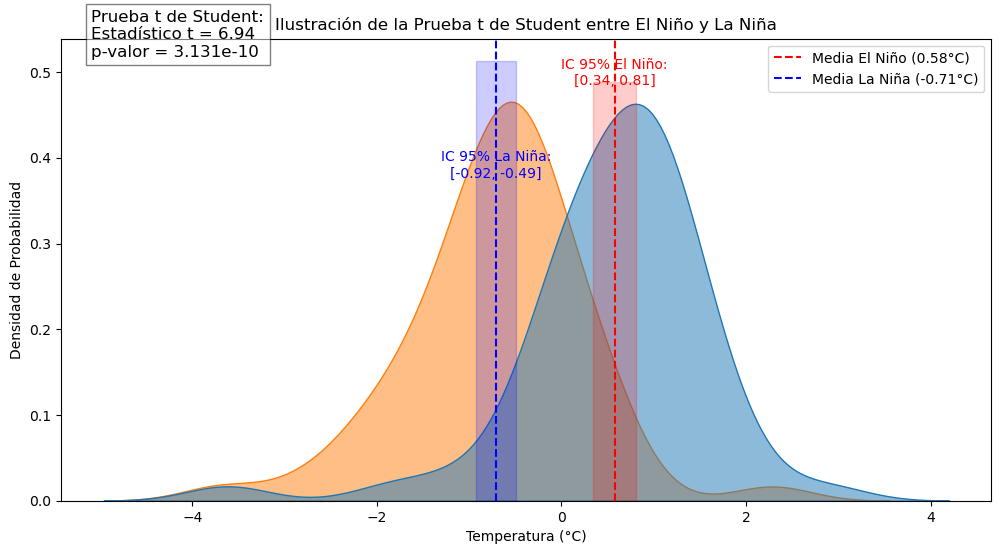

In [95]:
# Calcular las medias y desviaciones estándar
mean_el_nino = np.nanmean(data_el_nino)
std_el_nino = np.nanstd(data_el_nino)
n_el_nino = len(data_el_nino)

mean_la_nina = np.nanmean(data_la_nina)
std_la_nina = np.nanstd(data_la_nina)
n_la_nina = len(data_la_nina)

# Calcular los intervalos de confianza del 95%
conf_int_el_nino = stats.norm.interval(0.95, loc=mean_el_nino, scale=std_el_nino/np.sqrt(n_el_nino))
conf_int_la_nina = stats.norm.interval(0.95, loc=mean_la_nina, scale=std_la_nina/np.sqrt(n_la_nina))

# Realizar la prueba t de Student
t_statistic, p_value = stats.ttest_ind(data_el_nino, data_la_nina, equal_var=False, nan_policy='omit')

# Visualizar los resultados
plt.figure(figsize=(12, 6))

# Graficar las distribuciones KDE
sns.kdeplot(data=df_real, x='Temperatura', hue='Evento', fill=True, common_norm=False, alpha=0.5)

# Graficar las líneas verticales de las medias
plt.axvline(mean_el_nino, color='red', linestyle='--', label=f'Media El Niño ({mean_el_nino:.2f}°C)')
plt.axvline(mean_la_nina, color='blue', linestyle='--', label=f'Media La Niña ({mean_la_nina:.2f}°C)')

# Graficar los intervalos de confianza
plt.fill_betweenx(y=[0, plt.gca().get_ylim()[1]], x1=conf_int_el_nino[0], x2=conf_int_el_nino[1], color='red', alpha=0.2)
plt.fill_betweenx(y=[0, plt.gca().get_ylim()[1]], x1=conf_int_la_nina[0], x2=conf_int_la_nina[1], color='blue', alpha=0.2)

# Añadir anotaciones
plt.text(mean_el_nino, plt.gca().get_ylim()[1]*0.9, f"IC 95% El Niño:\n[{conf_int_el_nino[0]:.2f}, {conf_int_el_nino[1]:.2f}]", color='red', ha='center')
plt.text(mean_la_nina, plt.gca().get_ylim()[1]*0.7, f"IC 95% La Niña:\n[{conf_int_la_nina[0]:.2f}, {conf_int_la_nina[1]:.2f}]", color='blue', ha='center')

# Añadir el resultado de la prueba t en la gráfica
plt.figtext(0.15, 0.85, f'Prueba t de Student:\nEstadístico t = {t_statistic:.2f}\np-valor = {p_value:.3e}', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Añadir título y etiquetas
plt.title('Ilustración de la Prueba t de Student entre El Niño y La Niña')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Densidad de Probabilidad')

# Mostrar la leyenda
plt.legend()

In [96]:
df_real

,Temperatura,Evento
6,-3.616837,El Niño
7,0.702047,El Niño
9,0.088359,El Niño
10,-0.005354,El Niño
11,0.992639,El Niño
...,...,...
135,0.151685,La Niña
136,0.447933,La Niña
137,-0.172870,La Niña
138,-0.515259,La Niña


Al visualizar tus datos de esta manera con distribuciones de probabilidad, podrás entender mejor tus datos en general, pero también cómo la prueba t de Student evalúa la diferencia entre las medias de tus dos grupos. Las distribuciones de probabilidad ayudan a:

- Ver la superposición o separación de las distribuciones.
- Observar los intervalos de confianza de las medias.
- Comprender el resultado de la prueba t en el contexto de tus datos.

### **<font color="OrangeRed">  Ahora modo mapa </font>** 

- Graficar las anomalías de ENSO, con un mapa, y la significancia estadística de un compuesto. 

Paso 1. Hacer una función para calcular valores de p, dados 2 xarray datarrays. 

In [97]:
def calculate_p_values(data1, data2):
    """
    Realiza una prueba t de Student entre dos DataArrays de xarray a lo largo de la dimensión 'time'
    y devuelve un DataArray de p-values con dimensiones (lat, lon).

    Parámetros:
    - data1: xarray DataArray (por ejemplo, arr_el_nino)
    - data2: xarray DataArray (por ejemplo, arr_la_nina)

    Retorna:
    - p_values: xarray DataArray de p-values con dimensiones (lat, lon)
    """

  #  # Alinear los datos para asegurar que tengan las mismas coordenadas
   # data1, data2 = xr.align(data1, data2, join='inner')

    # Definir la función para la prueba t
    def ttest_func(x, y):
        # Eliminar NaNs
        x = x[~np.isnan(x)]
        y = y[~np.isnan(y)]
        # Verificar que haya suficientes datos
        if len(x) > 1 and len(y) > 1:
            t_stat, p = stats.ttest_ind(x, y, equal_var=False)
            return p
        else:
            return np.nan

    # Aplicar la función de manera vectorizada usando xarray.apply_ufunc
    p_values = xr.apply_ufunc(
        ttest_func, data1, data2,
        input_core_dims=[['time'], ['time']],  # Especificar la dimensión de tiempo
        vectorize=True,                        # Vectorizar la función
        dask='parallelized', 
        join='outer',# Permitir computación paralela con Dask
        output_dtypes=[float]                  # Especificar el tipo de dato de salida
    )

    return p_values

Vamos a preparar todos los datos porque el análisis anteriores fue para sólo un punto, pero ahora eso no nos sirve.
Tenemos que manipular nuestro objeto original `ds` utilizando solamente datos tropicales y en DJF.

In [98]:
# selección tropical
ds=ds.where(np.abs(ds.latitude)<50,drop=True)
# Añadir la información de temporada a la coordenada de tiempo
ds = ds.assign_coords(season=ds['time'].dt.season)
# Seleccionar los datos de DJF
ds = ds.where(ds['season'] == 'DJF', drop=True)

In [99]:
# Formatear las fechas como '%Y-%m' para evitar problemas de idioma
ds_dates_str = ds['time'].dt.strftime('%Y-%m')
# Asignar las cadenas de fecha como nueva coordenada
ds_w_dates = ds.assign_coords(time_str=ds_dates_str)

Hacemos la selección con los mismos datos que teníamos anteriormente.

In [100]:
# Crear máscaras booleanas para los eventos
el_nino_mask = ds_w_dates.time_str.isin(el_nino_dates_str)
la_nina_mask = ds_w_dates.time_str.isin(la_nina_dates_str)

In [101]:
# Seleccionar datos durante eventos de El Niño
ds_el_nino = ds_w_dates.where(el_nino_mask, drop=True)

# Seleccionar datos durante eventos de La Niña
ds_la_nina = ds_w_dates.where(la_nina_mask, drop=True)

In [102]:
# Calcular la media de las anomalías durante El Niño
mean_el_nino = composite_mean(ds_el_nino['tos'])

# Calcular la media de las anomalías durante La Niña
mean_la_nina = composite_mean(ds_la_nina['tos'])

# Calcular la diferencia entre las medias
diff_mean = mean_el_nino - mean_la_nina

En la siguiente celda hacemos dos pruebas. 

En la primer prueba, calculamos los p-valores al comparar las anomalías de SST durante eventos de El Niño `(ds_el_nino['tos'])` con las de La Niña (`ds_la_nina['tos]`). El objetivo es identificar las regiones donde las diferencias en las anomalías de SST entre los eventos positivos (El Niño) y negativos (La Niña) del ENSO son estadísticamente significativas. Esto nos permite visualizar dónde y en qué medida los eventos opuestos del ENSO afectan de manera diferente las temperaturas oceánicas.

En la segunda prueba, calculamos los p-valores al comparar las anomalías de SST del conjunto de datos completo (`ds['tos']`), que representa la climatología general o condiciones promedio, con las anomalías durante eventos de La Niña (`ds_la_nina['tos]`). El propósito es identificar las áreas donde La Niña presenta anomalías de SST estadísticamente significativas en comparación con las condiciones promedio. Esto nos ayuda a destacar las regiones donde los eventos negativos del ENSO (La Niña) tienen un impacto notable en las anomalías de temperatura oceánica.

In [104]:
# Calcular los p-values
p_values = calculate_p_values(ds_el_nino['tos'], ds_la_nina['tos'])
p_values_ln = calculate_p_values(ds['tos'], ds_la_nina['tos'])

In [105]:
p_values

<xarray.DataArray 'tos' (latitude: 20, longitude: 72)> Size: 12kB
array([[6.87319474e-03, 3.58062929e-02, 5.50157678e-02, ...,
        2.13317436e-03, 2.51957455e-02, 2.52023657e-01],
       [5.05186428e-04, 1.04913252e-01, 1.98642174e-01, ...,
        3.64286388e-03, 4.41437125e-04, 2.84745451e-04],
       [2.66939855e-03, 1.49427775e-02, 5.91476056e-02, ...,
        9.01290486e-05, 1.56143872e-05, 3.08883122e-05],
       ...,
       [5.52458293e-05, 5.29237326e-07, 8.38303040e-09, ...,
        4.88450711e-02, 5.25798180e-03, 2.97885857e-03],
       [8.99624339e-04, 3.36987246e-05, 1.70377414e-05, ...,
        3.85705574e-04, 2.14274442e-04, 4.95376097e-05],
       [2.42471761e-06, 3.63591536e-05, 5.46775721e-03, ...,
        4.02995926e-05, 6.50461795e-06, 9.19856631e-07]])
Coordinates:
  * latitude   (latitude) float64 160B -47.5 -42.5 -37.5 ... 37.5 42.5 47.5
  * longitude  (longitude) float64 576B -177.5 -172.5 -167.5 ... 172.5 177.5

In [106]:
print(p_values.max())

<xarray.DataArray 'tos' ()> Size: 8B
array(0.99229996)


### **<font color="OrangeRed">  El hatching </font>** 

Preparamos todo para el mapa, en este caso haremos **hatching** a las diferencias significativas.

El hatching, o tramado, es una técnica de visualización utilizada en gráficos y mapas para resaltar áreas específicas con un patrón de líneas, puntos u otros símbolos. En el contexto del análisis de este notebook, el hatching se utiliza para indicar regiones donde las diferencias en las anomalías de temperatura superficial del mar (SST) son estadísticamente significativas según los p-valores calculados.

In [107]:
lons=diff_mean.longitude
lats=diff_mean.latitude

In [108]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

/home/jorgelsgf/anaconda3/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/jorgelsgf/anaconda3/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/home/jorgelsgf/anaconda3/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/jorgelsgf/anaconda3/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.war

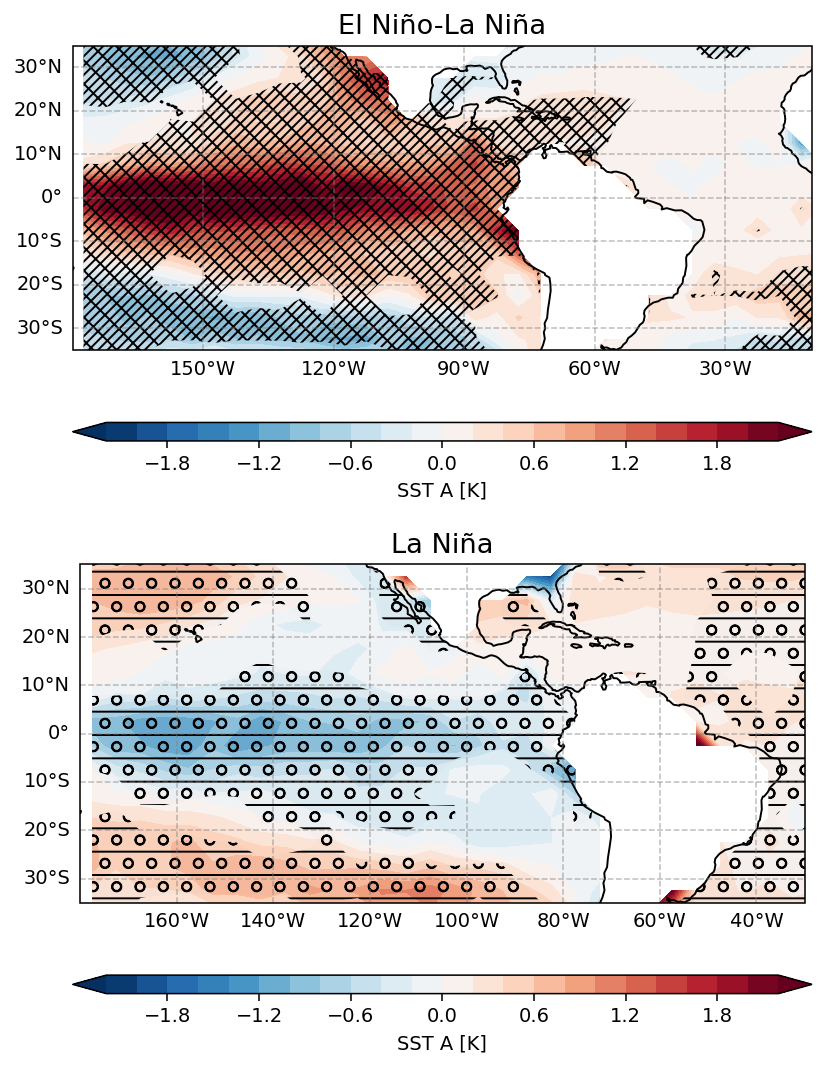

In [109]:
fig = plt.figure(figsize=(6,8),dpi=140)
ax = fig.add_subplot(2, 1, 1, projection=ccrs.PlateCarree(central_longitude=180))

ax.set_extent([-180,-10, -35, 35], crs=ccrs.PlateCarree())
gl=ax.gridlines(draw_labels=True, dms=True, x_inline=False,y_inline=False,color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
ax.coastlines()
cs=ax.contourf(lons,lats,diff_mean,levels=np.arange(-2.2,2.21,0.2),cmap='RdBu_r',transform=ccrs.PlateCarree(),extend='both')
cc=ax.contourf(lons,lats,p_values,levels=np.arange(0,0.051,0.05),colors='none',alpha=0.02,hatches=['/x/x/'],transform=ccrs.PlateCarree())
# el titulo es el string del año
plt.title('El Niño-La Niña',fontsize=14)
cbar=plt.colorbar(cs,orientation='horizontal',aspect=40)
cbar.ax.set_xlabel('SST A [K]')
ax = fig.add_subplot(2, 1, 2, projection=ccrs.PlateCarree(central_longitude=180))

ax.set_extent([-180,-30, -35, 35], crs=ccrs.PlateCarree())
gl=ax.gridlines(draw_labels=True, x_inline=False, y_inline=False,color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
ax.coastlines()
cs=ax.contourf(lons,lats,mean_la_nina,levels=np.arange(-2.2,2.21,0.2),cmap='RdBu_r',transform=ccrs.PlateCarree(),extend='both')
cc=ax.contourf(lons,lats,p_values_ln,levels=np.arange(0,0.051,0.05),colors='none',alpha=0.01,hatches=['o-'],transform=ccrs.PlateCarree())
# el titulo es el string del año
plt.title('La Niña',fontsize=14)
cbar=plt.colorbar(cs,orientation='horizontal',aspect=40)
cbar.ax.set_xlabel('SST A [K]')
plt.tight_layout()